<a href="https://colab.research.google.com/github/alman25/Bixi_Bike_Project/blob/main/Hold_Times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Table of Contents**
<a href="#scrollTo=OLNOVHKjGp9Y&line=1&uniqifier=1"> 1. Making the Dataframe</a> <br>

<a href="#scrollTo=gkFVuP2Uji8L&line=1&uniqifier=11"> 2. Data Cleaning</a> <br>

<a href="#scrollTo=kav9BlsI7Y5u&line=1&uniqifier=11"> 3. EDA</a>



In [1]:
#Importing pandas module
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import time

# **1. Making the Dataframe**

**Reading the google sheet into python.**

In [2]:
#Referencing the link id of the google sheet document.
gsheetid = "1qAdHM78Nicm0G6EYIClrh4N1ntbxEChLt_fQaJuxoDU"
sheet_name = "Hold_Times"

In [3]:
#Referencing the google url and formatting it
gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheetid, sheet_name)

In [4]:
#URL for the google sheet
gsheet_url

'https://docs.google.com/spreadsheets/d/1qAdHM78Nicm0G6EYIClrh4N1ntbxEChLt_fQaJuxoDU/gviz/tq?tqx=out:csv&sheet=Hold_Times'

In [5]:
#Reading the spreadsheet into python
df = pd.read_csv(gsheet_url)

#Making the dataframe
df.head()

,Reference Id,Corrected LCS,LCS Recorded At,Created At,Hold Time,Conv to IF
0,0a1e785b-2d54-4723-b54b-41dcf8,application_requested,1/2/2023 14:04:04,1/2/2023 14:18:19,00:03:58.809,False
1,0a2b0aa0-cfa6-4274-976c-049397,application_approved_with_modifications,1/24/2023 18:39:02,1/25/2023 12:19:41,00:02:22.381,False
2,0a2c957e-a5c9-481e-8303-cbea9e,application_in_underwriting,2/8/2023 10:41:18,1/26/2023 15:27:21,00:03:04.600,False
3,0a2c957e-a5c9-481e-8303-cbea9e,application_requested,1/26/2023 15:08:03,1/26/2023 15:27:21,00:03:04.600,False
4,0a2c957e-a5c9-481e-8303-cbea9e,sign_and_exam,1/26/2023 15:45:09,1/26/2023 15:27:21,00:03:04.600,False


In [6]:
#Finding the amount of rows and columns in the dataframe.
print(f'Our dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

Our dataframe has 13514 rows and 6 columns.


In [7]:
#Checking the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13514 entries, 0 to 13513
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reference Id     13514 non-null  object
 1   Corrected LCS    13514 non-null  object
 2   LCS Recorded At  13514 non-null  object
 3   Created At       13514 non-null  object
 4   Hold Time        13514 non-null  object
 5   Conv to IF       13514 non-null  bool  
dtypes: bool(1), object(5)
memory usage: 541.2+ KB


# **2. Data Cleaning**

In [8]:
#Checking to see if there are any duplicated rows.
df.duplicated().sum().any()

#I confirmed that there are no duplicates.

False

In [9]:
#Checking to see if any rows have any null values.
df.isnull().sum().any()

#This confirms none of the rows are duplicated

False

###*Converting **LCS Recorded At** column from object to datetime*

In [10]:
#Reviewing the "LCS Recorded At" column
df['LCS Recorded At']

0         1/2/2023 14:04:04
1        1/24/2023 18:39:02
2         2/8/2023 10:41:18
3        1/26/2023 15:08:03
4        1/26/2023 15:45:09
                ...        
13509    1/25/2023 17:38:24
13510    2/24/2023 16:07:55
13511      2/8/2023 8:52:38
13512     2/2/2023 22:29:24
13513     2/3/2023 14:15:11
Name: LCS Recorded At, Length: 13514, dtype: object

In order to explore information about this column I need to convert the datatype from an object to datetime.

Also, I notice the seconds are noted in here, but it's unnecessary information to me.

In [11]:
#Converting "LCS Recorded At" to datetime and zeroing out the seconds column
df['LCS Recorded At'] = pd.to_datetime(df['LCS Recorded At']).dt.floor('T')

In [12]:
#Confirming the datatype is datetime and the seconds column is zeroed out
df['LCS Recorded At']

0       2023-01-02 14:04:00
1       2023-01-24 18:39:00
2       2023-02-08 10:41:00
3       2023-01-26 15:08:00
4       2023-01-26 15:45:00
                ...        
13509   2023-01-25 17:38:00
13510   2023-02-24 16:07:00
13511   2023-02-08 08:52:00
13512   2023-02-02 22:29:00
13513   2023-02-03 14:15:00
Name: LCS Recorded At, Length: 13514, dtype: datetime64[ns]

###*Converting **Created At** column from object to datetime*

In [13]:
#Reviewing the "Created At" column
df['Created At']

0         1/2/2023 14:18:19
1        1/25/2023 12:19:41
2        1/26/2023 15:27:21
3        1/26/2023 15:27:21
4        1/26/2023 15:27:21
                ...        
13509    1/25/2023 17:59:19
13510     2/3/2023 14:11:44
13511     2/3/2023 14:11:44
13512     2/3/2023 14:11:44
13513     2/3/2023 14:11:44
Name: Created At, Length: 13514, dtype: object

In order to explore information about this column I need to convert the datatype from an object to datetime.

Also, just like the **LCS Recorded At** column, the seconds are noted in here, but it's unnecessary information to me.



In [14]:
#Converting "Created At" to datetime and zeroing out the seconds column
df['Created At'] = pd.to_datetime(df['Created At']).dt.floor('T')

In [15]:
#Confirming the datatype is datetime and the seconds column is zeroed out
df['Created At']

0       2023-01-02 14:18:00
1       2023-01-25 12:19:00
2       2023-01-26 15:27:00
3       2023-01-26 15:27:00
4       2023-01-26 15:27:00
                ...        
13509   2023-01-25 17:59:00
13510   2023-02-03 14:11:00
13511   2023-02-03 14:11:00
13512   2023-02-03 14:11:00
13513   2023-02-03 14:11:00
Name: Created At, Length: 13514, dtype: datetime64[ns]

###*Converting **Hold Time** column from object to datetime*

In [16]:
#Reviewing the "Hold Time" column
df['Hold Time']

0        00:03:58.809
1        00:02:22.381
2        00:03:04.600
3        00:03:04.600
4        00:03:04.600
             ...     
13509    00:02:14.400
13510     00:04:13.96
13511     00:04:13.96
13512     00:04:13.96
13513     00:04:13.96
Name: Hold Time, Length: 13514, dtype: object

In [17]:
#While converting the "Hold Time" column into datetime I decided to remove the milliseconds since I don't find that necessary
df['Hold Time'] = pd.to_datetime(df['Hold Time']).dt.floor('S')

In [18]:
#I confirmed that the "Hold Time" column dropped the milliseconds
print(df['Hold Time'])

0       2023-11-06 00:03:58
1       2023-11-06 00:02:22
2       2023-11-06 00:03:04
3       2023-11-06 00:03:04
4       2023-11-06 00:03:04
                ...        
13509   2023-11-06 00:02:14
13510   2023-11-06 00:04:13
13511   2023-11-06 00:04:13
13512   2023-11-06 00:04:13
13513   2023-11-06 00:04:13
Name: Hold Time, Length: 13514, dtype: datetime64[ns]


In [19]:
#Confirming that columsn "LCS Recorded At", "Created At" and "Hold Time" are converted from objects to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13514 entries, 0 to 13513
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Reference Id     13514 non-null  object        
 1   Corrected LCS    13514 non-null  object        
 2   LCS Recorded At  13514 non-null  datetime64[ns]
 3   Created At       13514 non-null  datetime64[ns]
 4   Hold Time        13514 non-null  datetime64[ns]
 5   Conv to IF       13514 non-null  bool          
dtypes: bool(1), datetime64[ns](3), object(2)
memory usage: 541.2+ KB


###*Removing Unnecessary Text in the **Corrected LCS** column*

In [20]:
#Removing the underscore in the text of the "Corrected LCS" column
df['Corrected LCS'] = df['Corrected LCS'].str.replace('_', ' ')

#Confirming the text appears with the underscore
print(df['Corrected LCS'])

0                          application requested
1        application approved with modifications
2                    application in underwriting
3                          application requested
4                                  sign and exam
                          ...                   
13509                      application requested
13510    application approved with modifications
13511                application in underwriting
13512                      application requested
13513                              sign and exam
Name: Corrected LCS, Length: 13514, dtype: object


In [21]:
#Confirming the text in Corrected LCS column appears cleanly in the dataframe
df.head()

,Reference Id,Corrected LCS,LCS Recorded At,Created At,Hold Time,Conv to IF
0,0a1e785b-2d54-4723-b54b-41dcf8,application requested,2023-01-02 14:04:00,2023-01-02 14:18:00,2023-11-06 00:03:58,False
1,0a2b0aa0-cfa6-4274-976c-049397,application approved with modifications,2023-01-24 18:39:00,2023-01-25 12:19:00,2023-11-06 00:02:22,False
2,0a2c957e-a5c9-481e-8303-cbea9e,application in underwriting,2023-02-08 10:41:00,2023-01-26 15:27:00,2023-11-06 00:03:04,False
3,0a2c957e-a5c9-481e-8303-cbea9e,application requested,2023-01-26 15:08:00,2023-01-26 15:27:00,2023-11-06 00:03:04,False
4,0a2c957e-a5c9-481e-8303-cbea9e,sign and exam,2023-01-26 15:45:00,2023-01-26 15:27:00,2023-11-06 00:03:04,False


###*Filtering out unwanted rows based on the values in the **Corrected LCS** column*

In [22]:
#Confirming the values in the Corrected LCS column
pd.value_counts(df['Corrected LCS'])

application requested                          2962
sign and exam                                  2652
application in underwriting                    2355
policy sent to client                          1099
application approved as applied                 862
policy in force                                 774
aps ordered                                     541
application approved with modifications         506
policy delivery reqs received                   445
application declined                            306
withdrawn                                       243
policy offer modified reissued                  166
policy rejected                                 145
application closed withdrawn                    116
phone screen decline                             86
case closed incomplete                           81
application in underwriting final review         59
merged                                           54
policy offer postponed                           26
underwriting

In [23]:
#Removing the values I don't want in my dataset anymore
df = df[df["Corrected LCS"].str.contains("aps ordered|application declined|withdrawn|policy offer modified reissued|policy rejected|application closed withdrawn|phone screen decline|case closed incomplete")==False]
df = df[df["Corrected LCS"].str.contains("merged|policy offer postponed|application pending client|application in underwriting tentative offer|client deceased|application closed incomplete no contact")==False]
df = df[df["Corrected LCS"].str.contains("application in underwriting final review|application in underwriting update|policy in force commission paid|policy lapsed")==False]

In [24]:
#Confirming I only see the rows with the values that I want to keep
pd.value_counts(df['Corrected LCS'])

application requested                      2962
sign and exam                              2652
application in underwriting                2355
policy sent to client                      1099
application approved as applied             862
policy in force                             774
application approved with modifications     506
policy delivery reqs received               445
Name: Corrected LCS, dtype: int64

In [25]:
#Checking to see the updated shape of the dataframe
df.shape

(11655, 6)

In [26]:
#Sorting the "Correct LCS" column in the order of the lifecycle stages in the natural order they are supposed to be in
def sorter(column):
  reorder = [
      'application requested',
      'sign and exam',
      'application in underwriting',
      'application approved as applied',
      'application approved with modifications',
      'policy sent to client'
      'policy delivery reqs received',
      'policy in force'

  ]

  cat = pd.Categorical(column, categories=reorder, ordered=True)
  return pd.Series(cat)

df = df.sort_values(by="Corrected LCS", key=sorter)

#**Important Notes:**

If client calls in we need to know what lifecycle stage the client was in

Example:
Call is on 7/10
App Req=7/1
S&E=7/7
UW=7/11

Since call was after S&E date but before UW we know it was in S&E

If **LCS Records At** comes later than **Created A**t it wasn't in that lcs

Sort by **LCS recorded At** (earliest to latest) and take the most recent occurence when **Recorded At** comes before **Created At**


Reference ID Examples:

0a5e8f45-bd85-4734-a48e-2e9b2b

988c493f-0486-419d-b73c-7849cb

0bceeb9d-325f-45e8-a287-7b38d5

In [ ]:
#Using this example as a reference by isolating all rows with the same "Reference ID"
df.loc[df['Reference Id'] == '988c493f-0486-419d-b73c-7849cb']

,Reference Id,Corrected LCS,LCS Recorded At,Created At,Hold Time,Conv to IF
10231,988c493f-0486-419d-b73c-7849cb,application requested,2023-01-06 15:40:00,2023-03-01 16:32:00,2023-11-04 00:02:15,True
10229,988c493f-0486-419d-b73c-7849cb,application requested,2023-01-06 15:40:00,2023-01-17 14:24:00,2023-11-04 00:02:34,True
10230,988c493f-0486-419d-b73c-7849cb,application requested,2023-01-06 15:40:00,2023-02-20 09:29:00,2023-11-04 00:02:01,True
10237,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-13 09:32:00,2023-03-01 16:32:00,2023-11-04 00:02:15,True
10236,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-13 09:32:00,2023-02-20 09:29:00,2023-11-04 00:02:01,True
10235,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-13 09:32:00,2023-01-17 14:24:00,2023-11-04 00:02:34,True
10232,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-06 18:22:00,2023-01-17 14:24:00,2023-11-04 00:02:34,True
10233,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-06 18:22:00,2023-02-20 09:29:00,2023-11-04 00:02:01,True
10234,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-06 18:22:00,2023-03-01 16:32:00,2023-11-04 00:02:15,True
10226,988c493f-0486-419d-b73c-7849cb,application in underwriting,2023-02-08 11:33:00,2023-01-17 14:24:00,2023-11-04 00:02:34,True


In [27]:
#Dropping rows of each "Reference ID" when "LCS Recorded At" date comes after the "Created At" date
df = df.drop(df['Reference Id'][df['LCS Recorded At']>df['Created At']].index.to_list())

In [ ]:
#Confirming that the only rows left for each "Reference ID" shows the "LCS Recorded At" comes before date/time for "Created At"
df.loc[df['Reference Id'] == '988c493f-0486-419d-b73c-7849cb']

,Reference Id,Corrected LCS,LCS Recorded At,Created At,Hold Time,Conv to IF
10231,988c493f-0486-419d-b73c-7849cb,application requested,2023-01-06 15:40:00,2023-03-01 16:32:00,2023-11-04 00:02:15,True
10229,988c493f-0486-419d-b73c-7849cb,application requested,2023-01-06 15:40:00,2023-01-17 14:24:00,2023-11-04 00:02:34,True
10230,988c493f-0486-419d-b73c-7849cb,application requested,2023-01-06 15:40:00,2023-02-20 09:29:00,2023-11-04 00:02:01,True
10237,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-13 09:32:00,2023-03-01 16:32:00,2023-11-04 00:02:15,True
10236,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-13 09:32:00,2023-02-20 09:29:00,2023-11-04 00:02:01,True
10235,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-13 09:32:00,2023-01-17 14:24:00,2023-11-04 00:02:34,True
10232,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-06 18:22:00,2023-01-17 14:24:00,2023-11-04 00:02:34,True
10233,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-06 18:22:00,2023-02-20 09:29:00,2023-11-04 00:02:01,True
10234,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-06 18:22:00,2023-03-01 16:32:00,2023-11-04 00:02:15,True
10227,988c493f-0486-419d-b73c-7849cb,application in underwriting,2023-02-08 11:33:00,2023-02-20 09:29:00,2023-11-04 00:02:01,True


In [28]:
#Checking the updated dataframe shape
df.shape

(5847, 6)

In [29]:
#Sorting the rows so that they are in ascending order based on "LCS Recorded At" date/time in case the "Corrected LCS" column is mistakenly sequenced in the wrong order
df = df.sort_values(by=['Reference Id', 'LCS Recorded At'], ascending=True)

In [ ]:
#Confirming the rows are sorted the way I want
df.loc[df['Reference Id'] == '988c493f-0486-419d-b73c-7849cb']

,Reference Id,Corrected LCS,LCS Recorded At,Created At,Hold Time,Conv to IF
10231,988c493f-0486-419d-b73c-7849cb,application requested,2023-01-06 15:40:00,2023-03-01 16:32:00,2023-11-04 00:02:15,True
10229,988c493f-0486-419d-b73c-7849cb,application requested,2023-01-06 15:40:00,2023-01-17 14:24:00,2023-11-04 00:02:34,True
10230,988c493f-0486-419d-b73c-7849cb,application requested,2023-01-06 15:40:00,2023-02-20 09:29:00,2023-11-04 00:02:01,True
10232,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-06 18:22:00,2023-01-17 14:24:00,2023-11-04 00:02:34,True
10233,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-06 18:22:00,2023-02-20 09:29:00,2023-11-04 00:02:01,True
10234,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-06 18:22:00,2023-03-01 16:32:00,2023-11-04 00:02:15,True
10237,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-13 09:32:00,2023-03-01 16:32:00,2023-11-04 00:02:15,True
10236,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-13 09:32:00,2023-02-20 09:29:00,2023-11-04 00:02:01,True
10235,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-13 09:32:00,2023-01-17 14:24:00,2023-11-04 00:02:34,True
10227,988c493f-0486-419d-b73c-7849cb,application in underwriting,2023-02-08 11:33:00,2023-02-20 09:29:00,2023-11-04 00:02:01,True


In [30]:
#Dropping all rows where "Reference ID" and "Created At" are duplicated and keeping only the row that was the most recent based on date and time.
#This now leaves one row everytime "Reference ID" has a different "Created At" date and time and references the most previous occurence from the "LCS Recorded At" date and time
df = df.sort_values(['LCS Recorded At', 'Created At']).drop_duplicates(['Reference Id', 'Created At'], keep='last')

In [ ]:
#Verifying the remaining values are valid
df.loc[df['Reference Id'] == '988c493f-0486-419d-b73c-7849cb']

,Reference Id,Corrected LCS,LCS Recorded At,Created At,Hold Time,Conv to IF
10235,988c493f-0486-419d-b73c-7849cb,sign and exam,2023-01-13 09:32:00,2023-01-17 14:24:00,2023-11-04 00:02:34,True
10227,988c493f-0486-419d-b73c-7849cb,application in underwriting,2023-02-08 11:33:00,2023-02-20 09:29:00,2023-11-04 00:02:01,True
10228,988c493f-0486-419d-b73c-7849cb,application in underwriting,2023-02-08 11:33:00,2023-03-01 16:32:00,2023-11-04 00:02:15,True


In [31]:
#Checking updated dataframe
print(f'Our dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

Our dataframe has 3726 rows and 6 columns.


The dataframe originally had 13,514 rows, but now I was able to weed out the unnecessary rows and keep only the essential information.

Now the dataframe has only 3,726 rows.

#**3. EDA**

In [32]:
#Reviewing the dataframe again
df

,Reference Id,Corrected LCS,LCS Recorded At,Created At,Hold Time,Conv to IF
12566,712397f8-38a4-4053-82c2-243879,application requested,2023-01-01 10:49:00,2023-01-09 10:30:00,2023-11-06 00:09:12,False
7857,92ebaf18-45f1-4358-ace5-20fd1e,application requested,2023-01-01 10:57:00,2023-01-04 12:36:00,2023-11-06 00:08:29,False
2594,4f957947-cdae-49ac-a6d7-e3a3ae,application requested,2023-01-01 11:12:00,2023-01-03 17:39:00,2023-11-06 00:03:04,False
12979,8823551f-abab-45ce-a9b2-5fa1d5,application requested,2023-01-01 11:36:00,2023-01-02 12:07:00,2023-11-06 00:01:17,False
4373,8aa89cae-e846-47fe-a05e-ed49be,sign and exam,2023-01-01 12:48:00,2023-01-01 12:48:00,2023-11-06 00:01:07,True
...,...,...,...,...,...,...
8135,010f6101-73cb-41a2-9240-217e50,application in underwriting,2023-03-01 12:03:00,2023-03-22 16:04:00,2023-11-06 00:01:55,False
1623,2f90270c-d6ed-4d0e-a03a-da03ca,policy sent to client,2023-03-01 12:10:00,2023-03-01 14:35:00,2023-11-06 00:00:28,True
13000,9352823e-6f35-4149-971f-ba3f86,application approved with modifications,2023-03-01 12:15:00,2023-03-07 15:10:00,2023-11-06 00:01:12,False
13147,28852733-2ad5-47e8-896e-9c90f2,policy sent to client,2023-03-01 12:21:00,2023-03-01 17:17:00,2023-11-06 00:02:06,True


In [33]:
#Checking the updated amount of rows per each value in the "Corrected LCS" column
pd.value_counts(df['Corrected LCS'])

application requested                      2142
sign and exam                               682
application in underwriting                 305
application approved with modifications     299
policy sent to client                       116
application approved as applied              98
policy in force                              65
policy delivery reqs received                19
Name: Corrected LCS, dtype: int64

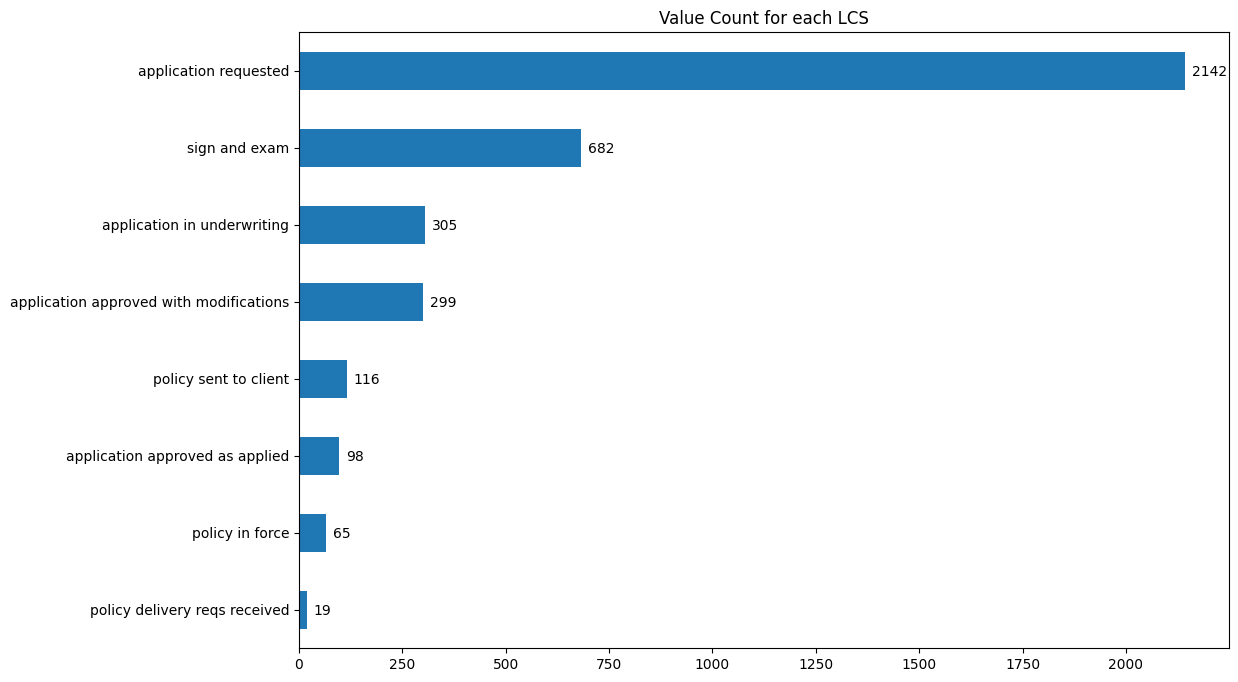

In [34]:
#Creating a bar graph of the above
bar = df['Corrected LCS'].value_counts().sort_values(ascending = True).plot(title = 'Value Count for each LCS', kind='barh', figsize=(12,8))

for p in bar.patches:
    bar.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

In [35]:
#Counting the amount of tickets that went inforce vs those that did not
pd.value_counts(df['Conv to IF']).sort_values(ascending = True)

True     1408
False    2318
Name: Conv to IF, dtype: int64

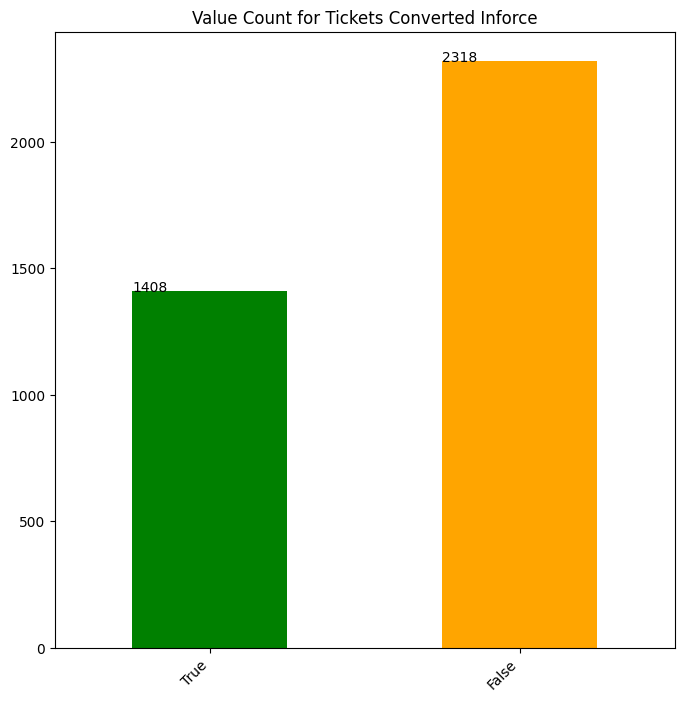

In [36]:
#Creating a bar graph of the above
ax = df['Conv to IF'].value_counts().sort_values(ascending = True).plot(title = 'Value Count for Tickets Converted Inforce',
                                                                        kind='bar', figsize=(8, 8), color=['green','orange'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)

In [37]:
#Checking the earliest recording in the dataset
print(df['LCS Recorded At'].min())

2023-01-01 10:49:00


In [38]:
#Checking the latest recording in the dataset
print(df['LCS Recorded At'].max())

2023-03-01 12:25:00


In [39]:
#Finding the average hold time for clients who went "In Force" vs those who did not.
df.groupby('Conv to IF')['Hold Time'].mean().sort_values(ascending=True)

Conv to IF
True    2023-11-06 00:02:05.024147712
False   2023-11-06 00:02:24.753667072
Name: Hold Time, dtype: datetime64[ns]

In [40]:
#Finding the average hold time for each "Corrected LCS" value
df.groupby('Corrected LCS')['Hold Time'].mean().sort_values(ascending=False)

Corrected LCS
policy delivery reqs received             2023-11-06 00:02:48.684210432
application requested                     2023-11-06 00:02:29.986461184
policy in force                           2023-11-06 00:02:19.692307712
application approved as applied           2023-11-06 00:02:17.326530560
sign and exam                             2023-11-06 00:02:09.441349120
policy sent to client                     2023-11-06 00:01:52.681034496
application in underwriting               2023-11-06 00:01:49.324590336
application approved with modifications   2023-11-06 00:01:39.882942976
Name: Hold Time, dtype: datetime64[ns]

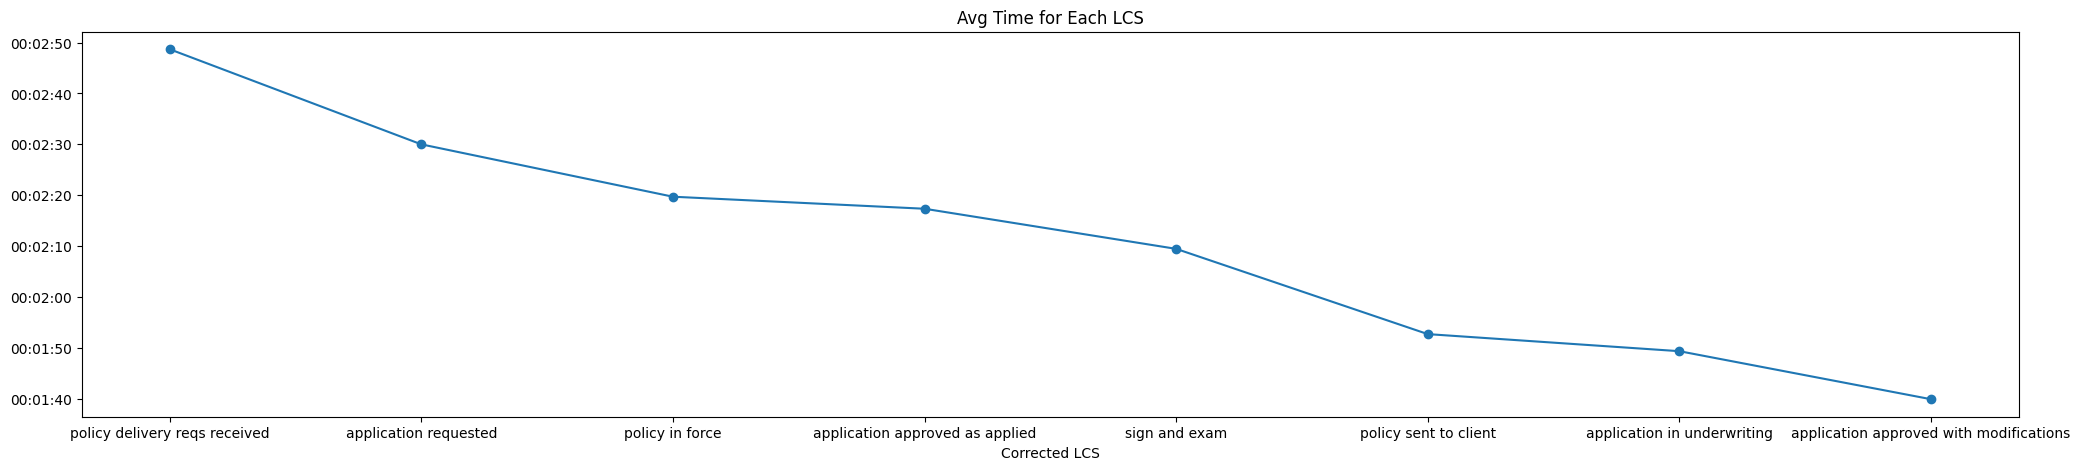

In [41]:
#Plotline chart comapring the average Hold Time for each LCS
df.groupby('Corrected LCS')['Hold Time'].mean().sort_values(ascending=False).plot(title='Avg Time for Each LCS',
                                                                                  style="-o", figsize=(25, 5));

**policy delivery reqs received** averaged the longest hold times <br>
**application approved with modifications** averaged the shortest hold times

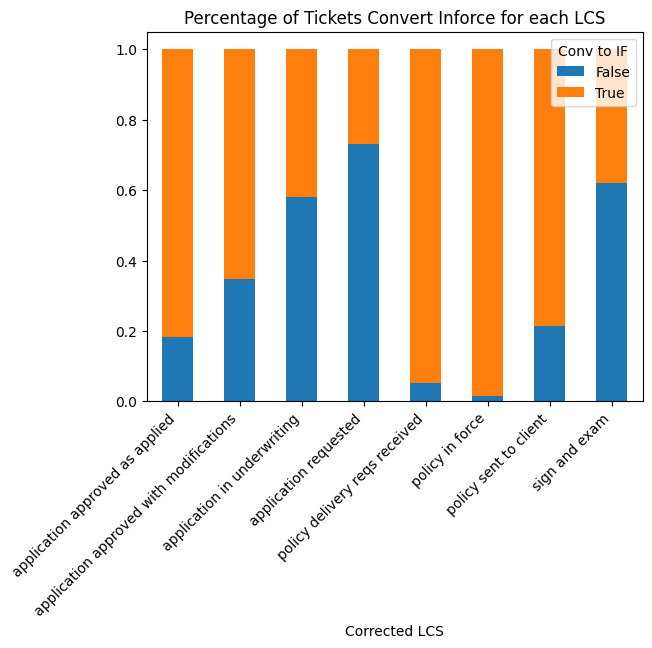

In [42]:
#Creating a chart that shows the percentage of tickets converted inforce for each LCS
df2 = df.groupby(["Corrected LCS","Conv to IF"]).size().unstack(1)
# modify from totals to percentages and plot
dx = df2.div(df2.sum(axis=1), axis=0).plot(title = 'Percentage of Tickets Convert Inforce for each LCS',
                                           kind="bar", stacked=True)
for label in dx.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)

In [43]:
#Reviewing dataframe again
df

,Reference Id,Corrected LCS,LCS Recorded At,Created At,Hold Time,Conv to IF
12566,712397f8-38a4-4053-82c2-243879,application requested,2023-01-01 10:49:00,2023-01-09 10:30:00,2023-11-06 00:09:12,False
7857,92ebaf18-45f1-4358-ace5-20fd1e,application requested,2023-01-01 10:57:00,2023-01-04 12:36:00,2023-11-06 00:08:29,False
2594,4f957947-cdae-49ac-a6d7-e3a3ae,application requested,2023-01-01 11:12:00,2023-01-03 17:39:00,2023-11-06 00:03:04,False
12979,8823551f-abab-45ce-a9b2-5fa1d5,application requested,2023-01-01 11:36:00,2023-01-02 12:07:00,2023-11-06 00:01:17,False
4373,8aa89cae-e846-47fe-a05e-ed49be,sign and exam,2023-01-01 12:48:00,2023-01-01 12:48:00,2023-11-06 00:01:07,True
...,...,...,...,...,...,...
8135,010f6101-73cb-41a2-9240-217e50,application in underwriting,2023-03-01 12:03:00,2023-03-22 16:04:00,2023-11-06 00:01:55,False
1623,2f90270c-d6ed-4d0e-a03a-da03ca,policy sent to client,2023-03-01 12:10:00,2023-03-01 14:35:00,2023-11-06 00:00:28,True
13000,9352823e-6f35-4149-971f-ba3f86,application approved with modifications,2023-03-01 12:15:00,2023-03-07 15:10:00,2023-11-06 00:01:12,False
13147,28852733-2ad5-47e8-896e-9c90f2,policy sent to client,2023-03-01 12:21:00,2023-03-01 17:17:00,2023-11-06 00:02:06,True


In [ ]:
#Number of tickets on a minute by minute basis
df.groupby(pd.Grouper(key='Hold Time', freq="1T")).agg({'Hold Time':'count'})

,Hold Time
Hold Time,
2023-11-01 00:00:00,890
2023-11-01 00:01:00,1109
2023-11-01 00:02:00,865
2023-11-01 00:03:00,344
2023-11-01 00:04:00,214
2023-11-01 00:05:00,126
2023-11-01 00:06:00,59
2023-11-01 00:07:00,36
2023-11-01 00:08:00,27


In [44]:
#Finding the amount of tickets that converted vs failed to convert on a minute by minute basis
df.groupby(['Conv to IF', pd.Grouper(key='Hold Time', freq='1min')]).agg({'Conv to IF':'count'})

Conv to IF
Conv to IF Hold Time                      
False      2023-11-06 00:00:00         502
           2023-11-06 00:01:00         673
           2023-11-06 00:02:00         554
           2023-11-06 00:03:00         229
           2023-11-06 00:04:00         149
           2023-11-06 00:05:00          92
           2023-11-06 00:06:00          36
           2023-11-06 00:07:00          26
           2023-11-06 00:08:00          19
           2023-11-06 00:09:00          10
           2023-11-06 00:10:00           4
           2023-11-06 00:11:00           8
           2023-11-06 00:12:00           5
           2023-11-06 00:13:00           3
           2023-11-06 00:14:00           1
           2023-11-06 00:15:00           3
           2023-11-06 00:16:00           1
           2023-11-06 00:17:00           3
True       2023-11-06 00:00:00         388
           2023-11-06 00:01:00         436
           2023-11-06 00:02:00         311
           2023-11-06 00:03:00         115
           2023-11-06 00:04:00          65
           2023-11-06 00:05:00          34
           2023-11-06 00:06:00          23
           2023-11-06 00:07:00          10
           2023-11-06 00:08:00           8
           2023-11-06 00:09:00           6
           2023-11-06 00:10:00           1
           2023-11-06 00:11:00           1
           2023-11-06 00:12:00           2
           2023-11-06 00:13:00           2
           2023-11-06 00:14:00           1
           2023-11-06 00:15:00           2
           2023-11-06 00:16:00           1
           2023-11-06 00:17:00           2

In [ ]:
#https://stackoverflow.com/questions/51195449/pandas-group-by-date-range-different-calculations-on-multiple-column

In [45]:
#Making sure the Hold Time column only shows the time as the date is not necessary here
df['Hold Time'] = pd.to_datetime(df['Hold Time']).dt.time

In [46]:
#Showing the dataframe one last time
df

,Reference Id,Corrected LCS,LCS Recorded At,Created At,Hold Time,Conv to IF
12566,712397f8-38a4-4053-82c2-243879,application requested,2023-01-01 10:49:00,2023-01-09 10:30:00,00:09:12,False
7857,92ebaf18-45f1-4358-ace5-20fd1e,application requested,2023-01-01 10:57:00,2023-01-04 12:36:00,00:08:29,False
2594,4f957947-cdae-49ac-a6d7-e3a3ae,application requested,2023-01-01 11:12:00,2023-01-03 17:39:00,00:03:04,False
12979,8823551f-abab-45ce-a9b2-5fa1d5,application requested,2023-01-01 11:36:00,2023-01-02 12:07:00,00:01:17,False
4373,8aa89cae-e846-47fe-a05e-ed49be,sign and exam,2023-01-01 12:48:00,2023-01-01 12:48:00,00:01:07,True
...,...,...,...,...,...,...
8135,010f6101-73cb-41a2-9240-217e50,application in underwriting,2023-03-01 12:03:00,2023-03-22 16:04:00,00:01:55,False
1623,2f90270c-d6ed-4d0e-a03a-da03ca,policy sent to client,2023-03-01 12:10:00,2023-03-01 14:35:00,00:00:28,True
13000,9352823e-6f35-4149-971f-ba3f86,application approved with modifications,2023-03-01 12:15:00,2023-03-07 15:10:00,00:01:12,False
13147,28852733-2ad5-47e8-896e-9c90f2,policy sent to client,2023-03-01 12:21:00,2023-03-01 17:17:00,00:02:06,True
